# Практическая задача

1. Загрузить реальный датасет для задачи регрессии
2. Обучить модель RandomForestRegressor
3. Определить важность признаков
4. Визуализировать результаты в виде бар-чарта.

In [20]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
dataset = fetch_california_housing()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = dataset.target

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
rf = RandomForestRegressor(n_estimators=200, max_depth=10, max_features='sqrt')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [24]:
print("MSE:", mean_squared_error(y_test, y_pred), "R2:", r2_score(y_test, y_pred))

MSE: 0.299797314031324 R2: 0.7715899786630829


In [25]:
importances = rf.feature_importances_
indicies = np.argsort(importances)[::-1]

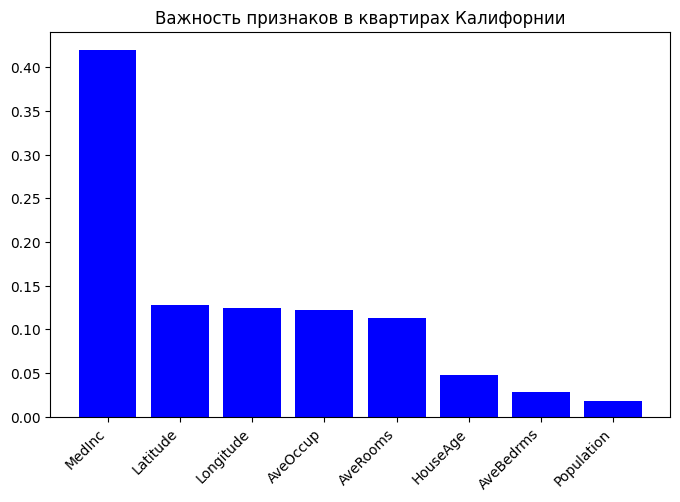

In [26]:
%matplotlib inline
plt.figure(figsize=(8,5))
plt.bar(range(X.shape[1]), importances[indicies], color='blue')
plt.xticks(range(X.shape[1]), [dataset.feature_names[i] for i in indicies], rotation=45, ha='right')
plt.title("Важность признаков в квартирах Калифорнии")
plt.show()